## Give Me The Next AAA Title
# Predictive Modeling
### Movie Profitability Prediction Based on Popularity
****

<br>
by Dustin Reyes
<br>
<br>
Prepared for:
<br>
Mynt (Globe Fintech Innovations, Inc.)
<br>
<br>

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
import matplotlib
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, make_scorer, accuracy_score
from collections import Counter
from xgboost import XGBClassifier, plot_importance
from pytrends.request import TrendReq

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
tqdm.pandas()
%matplotlib inline

In [2]:
df = pd.read_csv('data2/data_imdb_complete.csv')
df.drop(['originalTitle', 'primaryTitle', 'isAdult',
         'leadActor', 'tconst', 'director', 'budget_mil', 'opening_mil', 'titleType', 'top3_actors'], axis=1, inplace=True)
df.head()

,title,release,budget,opening,gross,worldwide_gross,metacritic_score,mpaa_rating,startYear,runtimeMinutes,genres,averageRating,numVotes
0,Season of the Witch,2011-01-07,40000000,10612375,24827228,91627228.0,28.0,PG-13,2011,95,Action,5.4,90902
1,The Green Hornet,2011-01-14,120000000,33526876,98780042,227817248.0,39.0,PG-13,2011,119,Action,5.8,155886
2,The Mechanic,2011-01-28,40000000,11422006,29121498,76130093.0,49.0,R,2011,93,Action,6.6,152076
3,The Rite,2011-01-28,37000000,14789393,33047633,96560591.0,38.0,PG-13,2011,114,Drama,6.0,91850
4,Sanctum,2011-02-04,30000000,9447930,23209310,108609310.0,42.0,R,2011,108,Action,5.9,53868


In [3]:
df2 = pd.read_csv('data2/movie_popularity2.csv')
df2.head()

,title,search_interest,year
0,Season of the Witch,943,2011
1,The Green Hornet,694,2011
2,The Mechanic,1260,2011
3,The Rite,1036,2011
4,Sanctum,1038,2011


In [4]:
df3 = df.merge(df2, on = 'title')
df3.head()

,title,release,budget,opening,gross,worldwide_gross,metacritic_score,mpaa_rating,startYear,runtimeMinutes,genres,averageRating,numVotes,search_interest,year
0,Season of the Witch,2011-01-07,40000000,10612375,24827228,91627228.0,28.0,PG-13,2011,95,Action,5.4,90902,943,2011
1,The Green Hornet,2011-01-14,120000000,33526876,98780042,227817248.0,39.0,PG-13,2011,119,Action,5.8,155886,694,2011
2,The Mechanic,2011-01-28,40000000,11422006,29121498,76130093.0,49.0,R,2011,93,Action,6.6,152076,1260,2011
3,The Rite,2011-01-28,37000000,14789393,33047633,96560591.0,38.0,PG-13,2011,114,Drama,6.0,91850,1036,2011
4,Sanctum,2011-02-04,30000000,9447930,23209310,108609310.0,42.0,R,2011,108,Action,5.9,53868,1038,2011


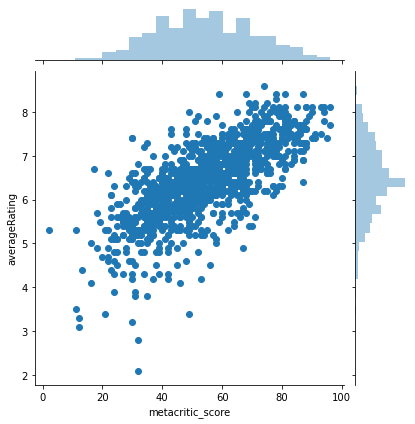

In [6]:
sns.jointplot(data=df3, x='metacritic_score', y='averageRating')